**Zadanie 1**<br />
Za pomocą języka R przeanalizować dowolne dane z poprzednich laboratoriów. Elementy obowiązkowe:<br />

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)).<br />
2. Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)<br />
3. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy)<br />
4. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników. Słupki błędów można narysować korzystając z funkcji geom_errorbar pakietu ggplot2 .<br />
5. Użyć aproksymacji wielomianowej dostępnej w języku R do znalezienia odpowiednich wielomianów, które najlepiej pasują do wyniokw każdego z algorytmów. Dodać wykresy uzyskanych wielomianow do wykresu.

Do wykonania zadania używam danych z laboratorium 2, tj. porównanie czasów iloczynu dwóch wektorów oraz mnożenia macierzy przez wektor w zależności od długości wektorów w przypadku pierwszym, oraz szerokości/długości macierzy kwadratowej w przypadku drugim.

In [2]:
times = read.csv("time.csv")
times

length,time,type
10000,8.7010e-06,dot
10000,7.4000e-06,dot
10000,6.5000e-06,dot
10000,6.5010e-06,dot
10000,6.4990e-06,dot
10000,6.6010e-06,dot
10000,6.5990e-06,dot
10000,6.5010e-06,dot
10000,6.6010e-06,dot
10000,6.5000e-06,dot


Obliczono średni czas w zależności od typu funkcji oraz rozmiaru wektora.

In [3]:
avg_times = aggregate( time ~ length:type, data=times, FUN=mean)
avg_times

length,type,time
500,*,0.0008995502
600,*,0.0009387400
700,*,0.0014919599
800,*,0.0020843904
900,*,0.0024463199
1000,*,0.0038584900
1100,*,0.0038703999
1200,*,0.0052843501
1300,*,0.0191680396
1400,*,0.0072994202


Następnie dodano kolumnę z odchyleniem standardowym dla poszczególnych długości wektora i rodzaju funkcji.

In [4]:
avg_times$sd = aggregate( time ~ length:type, data=times, FUN=sd)$time
avg_times

length,type,time,sd
500,*,0.0008995502,0.0007665171
600,*,0.0009387400,0.0004833795
700,*,0.0014919599,0.0006154036
800,*,0.0020843904,0.0007742206
900,*,0.0024463199,0.0005601818
1000,*,0.0038584900,0.0006622072
1100,*,0.0038703999,0.0006400677
1200,*,0.0052843501,0.0009271943
1300,*,0.0191680396,0.0305654978
1400,*,0.0072994202,0.0005868481


Następnie wykonano wykresy czasu w zależności od długości wektora dla poszczególnych funkcji.

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Loading required package: gridExtra
Warning message:
"package 'gridExtra' was built under R version 3.6.3"

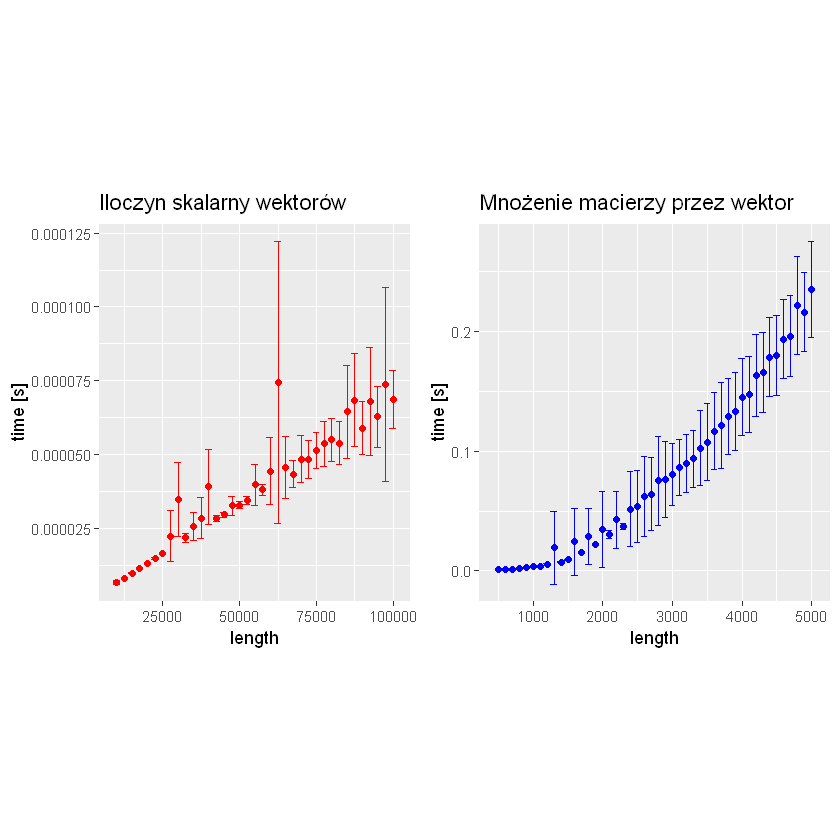

In [5]:
library("ggplot2")
avg_dot = avg_times[avg_times$type=="dot",]
avg_star = avg_times[avg_times$type=="*",]
par(mfrow=c(1,2))
plot1 = ggplot(avg_dot, aes(length,time)) + geom_point(color="red")
plot1 = plot1 + labs(x="length", y="time [s]",title="Iloczyn skalarny wektorów") + geom_errorbar(aes(ymin=time-sd, ymax=time+sd),color="red")
plot2 = ggplot(avg_star, aes(length,time)) + geom_point(color="blue")
plot2 = plot2 + labs(x="length", y="time [s]",title="Mnożenie macierzy przez wektor")+ geom_errorbar(aes(ymin=time-sd, ymax=time+sd),color="blue")
require(gridExtra)
grid.arrange(plot1, plot2, ncol=2,heights=unit(c(10), c("cm")))

Następnie używając aproksymacji wielomianowej szukano odpowiednio dopasowanych wielomianów (w przypadku pierwszego wykresu spodziewano się, że będzie to wielomian stopnia pierwszego, w przypadku drugiego-stopnia drugiego).

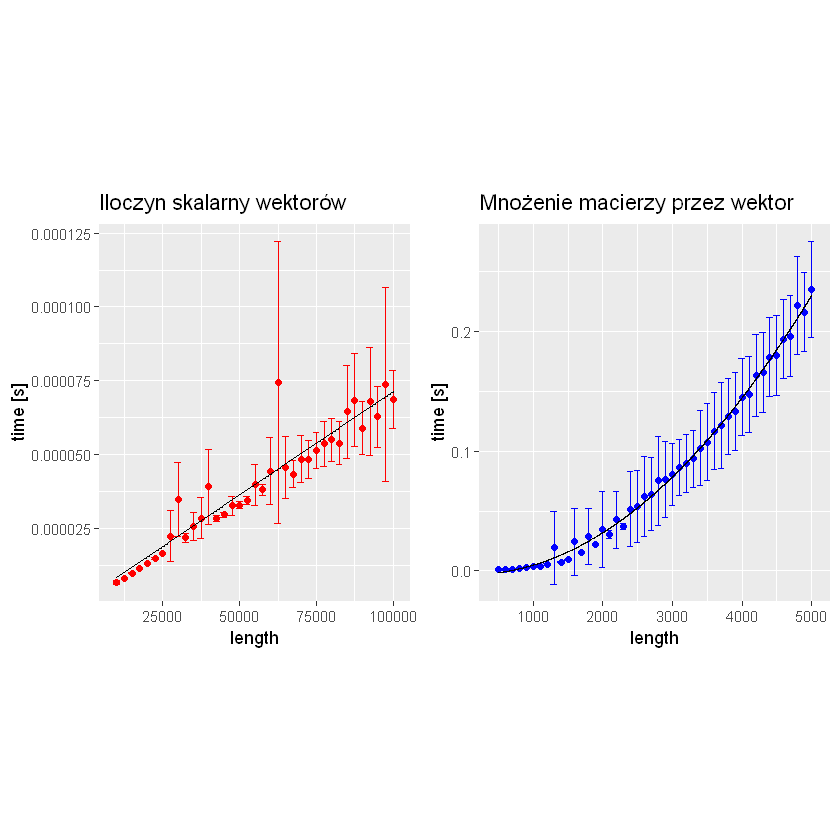

In [6]:
fit1 = lm(time ~ poly(length, 1, raw=TRUE), data=avg_dot[,c("length","time")])
data1 = data.frame(length = seq(10000,100000, length.out=1000000))
data1$time = predict(fit1, data1)
plot1 = plot1 + geom_line(data=data1, aes(length,time))
fit2 = lm(time ~ poly(length, 2, raw=TRUE), data=avg_star[,c("length","time")])
data2 = data.frame(length = seq(500,5000, length.out=10000))
data2$time = predict(fit2, data2)
plot2 = plot2 + geom_line(data=data2, aes(length,time))
require(gridExtra)
grid.arrange(plot1, plot2, ncol=2,heights=unit(c(10), c("cm")))

**Zadanie 2**<br />
Dopasować krzywą wykładniczą do liczby zakażonych koronawirusem w Polsce. Przykładowe źródło danych w GoogleDoc. Jak zmieniają się krzywe, gdy do aproksymacji użyjemy danych z ostatnich 7 lub 14 dni, a jak gdy użyjemy danych z pierwszych 7 lub 14 dni. Porównać na wykresach.

Źródło używanych danych: https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset <br />
Wszystkie obliczenia zostały wykonane na danych z dnia 30 marca.

In [7]:
covid = read.csv("covid19.csv")
covidPoland = covid[covid$Country.Region=="Poland",]
covidPoland = subset(covidPoland,select=c("ObservationDate","Confirmed"))
covidPoland

,ObservationDate,Confirmed
3373,03/04/2020,1
3541,03/05/2020,1
3666,03/06/2020,5
3871,03/07/2020,5
4087,03/08/2020,11
4334,03/09/2020,16
4595,03/10/2020,22
4801,03/11/2020,31
5008,03/12/2020,49
5288,03/13/2020,68


Porównano, jak zmieniają się krzywe dopasowane do danych, jeśli używa się danych z pierwszych 14 dni oraz z ostatnich 14 dni.

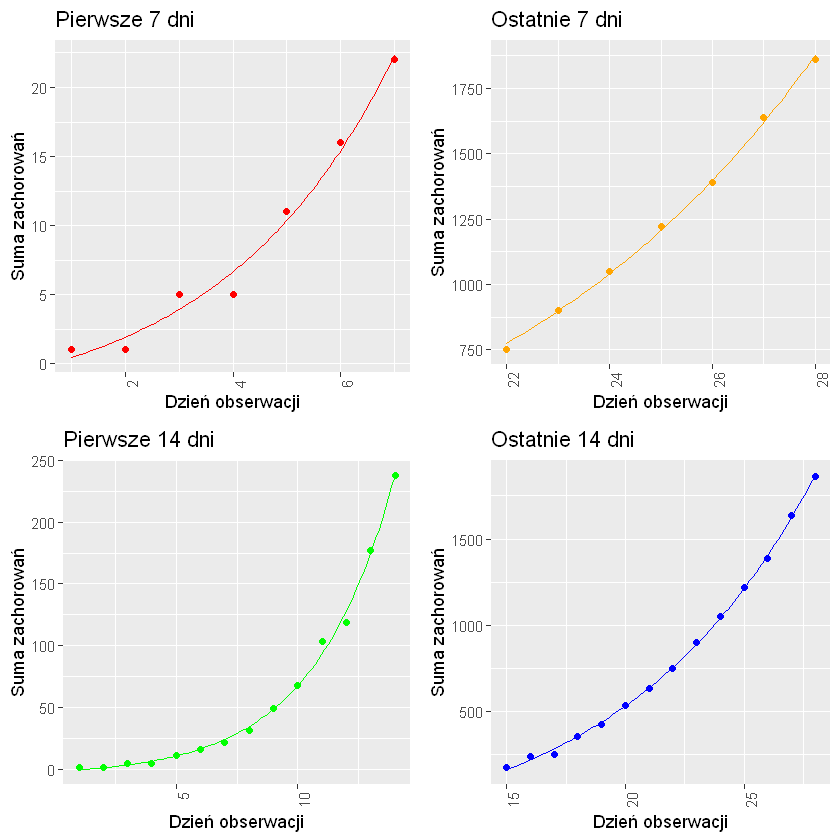

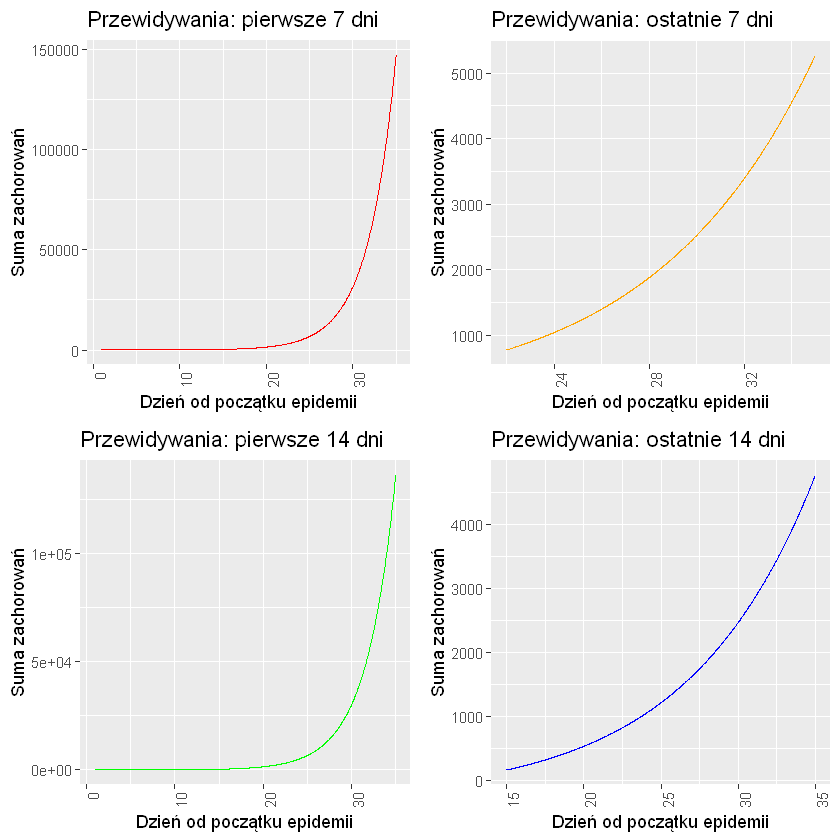

In [30]:
last = tail(covidPoland,14)
first = head(covidPoland,14)
last2 = tail(covidPoland,7)
first2 = head(covidPoland,7)
Days = (1:14)
Days2 = (1:7)
Days3 = (15:28)
Days4 = (22:28)

model.last = nls(Confirmed ~ I(a*b^Days3+c),start=c(a=1,b=2,c=0) ,data = last,control = list(maxiter = 100))
data.last = data.frame(Days3 = seq(15,28, length.out=100))
data.last$Prediction = predict(model.last,data.last)
plot2=ggplot(last, aes(Days3,Confirmed), las=1) + geom_point(color="blue") + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.last, aes(Days3,Prediction),color="blue")+labs(x="Dzień obserwacji", y="Suma zachorowań",title="Ostatnie 14 dni")

model.first= nls(Confirmed ~ I(a*b^Days+c),start=c(a=1,b=2,c=0) ,data = first)
data.first = data.frame(Days = seq(1,14, length.out=100))
data.first$Prediction = predict(model.first,data.first)
plot1=ggplot(first, aes(Days,Confirmed), las=1) + geom_point(color="green") + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.first, aes(Days,Prediction), color="green")+labs(x="Dzień obserwacji", y="Suma zachorowań",title="Pierwsze 14 dni")

model.first2= nls(Confirmed ~ I(a*b^Days2+c),start=c(a=1,b=2,c=0) ,data = first2)
data.first2 = data.frame(Days2 = seq(1,7, length.out=100))
data.first2$Prediction = predict(model.first2,data.first2)
plot3=ggplot(first2, aes(Days2,Confirmed), las=1) + geom_point(color="red") + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.first2, aes(Days2,Prediction), color="red")+labs(x="Dzień obserwacji", y="Suma zachorowań",title="Pierwsze 7 dni")

model.last2= nls(Confirmed ~ I(a*b^Days4),start=c(a=4,b=2) ,data = last2,control = list(maxiter = 100))
data.last2 = data.frame(Days4 = seq(22,28, length.out=100))
data.last2$Prediction = predict(model.last2,data.last2)
plot4=ggplot(last2, aes(Days4,Confirmed), las=1) + geom_point(color="orange") + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.last2, aes(Days4,Prediction), color="orange")+labs(x="Dzień obserwacji", y="Suma zachorowań",title="Ostatnie 7 dni")

require(gridExtra)
grid.arrange(plot3, plot4, plot1, plot2, ncol=2)

data.predict1 = data.frame(Days = seq(1,35, length.out=1000))
data.predict1$Prediction = predict(model.first,data.predict1)
plot5=ggplot(data.predict1, aes(Days,Prediction), las=1) + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.predict1, aes(Days,Prediction), color="green")+labs(x="Dzień od początku epidemii", y="Suma zachorowań",title="Przewidywania: pierwsze 14 dni")

data.predict2 = data.frame(Days3 = seq(15,35, length.out=1000))
data.predict2$Prediction = predict(model.last,data.predict2)
plot6=ggplot(data.predict2, aes(Days,Prediction), las=1) + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.predict2, aes(Days3,Prediction), color="blue")+labs(x="Dzień od początku epidemii", y="Suma zachorowań",title="Przewidywania: ostatnie 14 dni")

data.predict3 = data.frame(Days2 = seq(1,35, length.out=1000))
data.predict3$Prediction = predict(model.first2,data.predict3)
plot7=ggplot(data.predict3, aes(Days,Prediction), las=1) + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.predict3, aes(Days2,Prediction), color="red")+labs(x="Dzień od początku epidemii", y="Suma zachorowań",title="Przewidywania: pierwsze 7 dni")

data.predict4 = data.frame(Days4 = seq(22,35, length.out=1000))
data.predict4$Prediction = predict(model.last2,data.predict4)
plot8=ggplot(data.predict4, aes(Days,Prediction), las=1) + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.predict4, aes(Days4,Prediction), color="orange")+labs(x="Dzień od początku epidemii", y="Suma zachorowań",title="Przewidywania: ostatnie 7 dni")

require(gridExtra)
grid.arrange(plot7,plot8,plot5, plot6, ncol=2)

Widać, że zarówno krzywe jak i przewidywania co do ilości potwierdzonych przypadków różnią się znacząco w zależności od tego, czy weźmiemy dane z początkowego, czy późniejszego okresu epidemii, oraz od długości okresu, jaki weźmiemy pod uwagę.
<br />Przykładowo, przewidywania dla 35 dnia epidemii wachają się od niecałych 5 tys zachorowań do ponad 150 tys.
<br />Na wykresie poniżej zestawiono wszystkie cztery krzywe.

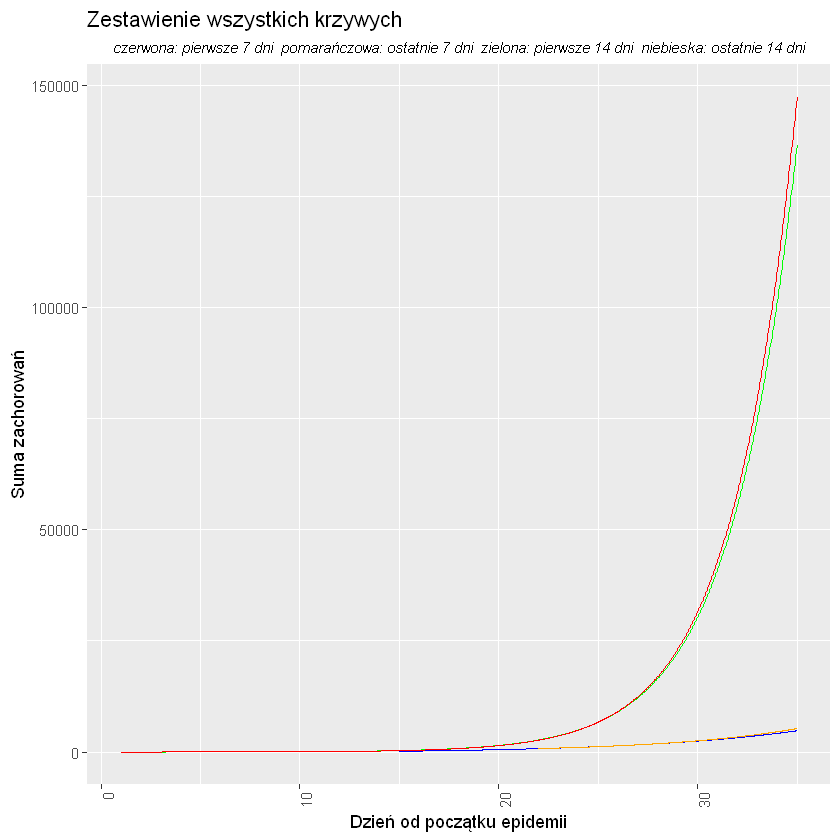

In [31]:
ggplot(data.predict1, aes(Days,Prediction), las=1) + theme(axis.text.x = element_text(angle = 90, hjust = 1))+geom_line(data=data.predict1, aes(Days,Prediction), color="green")+labs(x="Dzień od początku epidemii", y="Suma zachorowań",title="Zestawienie wszystkich krzywych", subtitle="czerwona: pierwsze 7 dni  pomarańczowa: ostatnie 7 dni  zielona: pierwsze 14 dni  niebieska: ostatnie 14 dni")+geom_line(data=data.predict2, aes(Days3,Prediction), color="blue")+geom_line(data=data.predict3, aes(Days2,Prediction), color="red")+geom_line(data=data.predict4, aes(Days4,Prediction), color="orange")+ theme(plot.subtitle=element_text(size=9, hjust=0.5, face="italic", color="black"))


Następnie dopasowano krzywą, biorąc pod uwagę całość dostępnych danych.

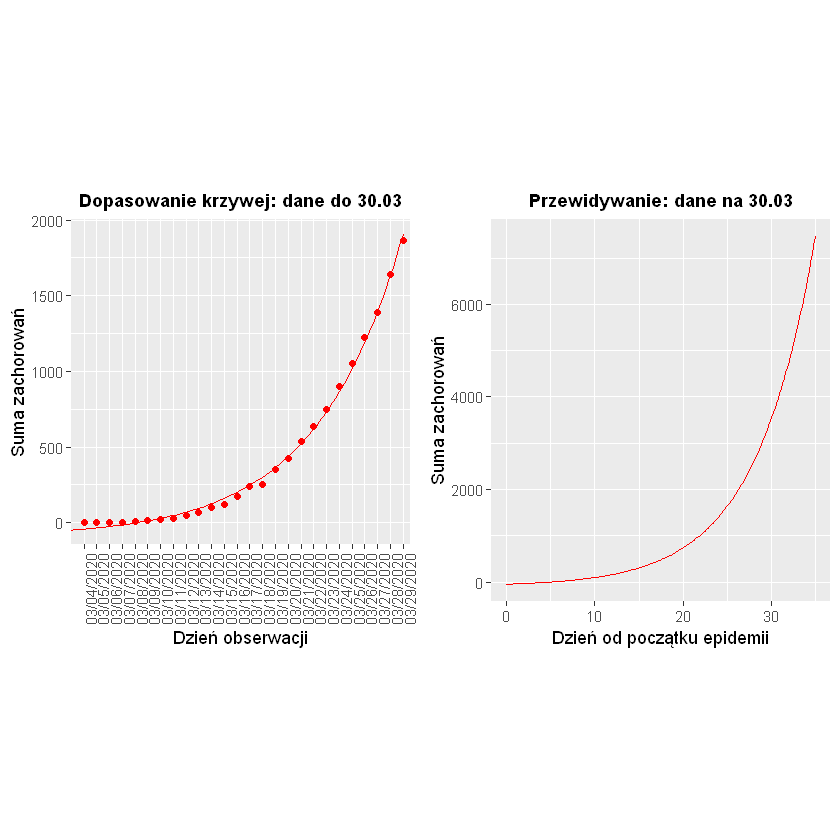

In [32]:
Days = c(1:26)
model <- nls(Confirmed ~ I(a*b^Days+c), start=c(a=1,b=2,c=0), data = covidPoland,  control = list(maxiter = 100))
data2 = data.frame(Days = seq(0,26, length.out=100))
data2$Prediction = predict(model,data2)
plot1 = ggplot(covidPoland, aes(ObservationDate,Confirmed), las=1,scale_x_date(breakes= covidPoland$ObservationDate[1,26,by=2])) + geom_point(color="red") + theme(axis.text.x = element_text(angle = 90, hjust = 1))+ geom_line(data=data2, aes(Days,Prediction),color="red")+labs(x="Dzień obserwacji", y="Suma zachorowań",title="Dopasowanie krzywej: dane do 30.03")+ theme(plot.title=element_text(size=11, hjust=0.5, face="bold", color="black"))
data3 = data.frame(Days = seq(0,35, length.out=200))
data3$Prediction = predict(model,data3)
plot2 = ggplot(data3, aes(xes,prediction))+ geom_line(data=data3, aes(Days,Prediction),color="red")+labs(x="Dzień od początku epidemii", y="Suma zachorowań",title="Przewidywanie: dane na 30.03")+ theme(plot.title=element_text(size=11, hjust=0.5, face="bold", color="black"))
require(gridExtra)
grid.arrange(plot1, plot2, ncol=2,heights=unit(c(10), c("cm")))

Model stworzony na podstwie całości dostępnych danych na 35 dzień epidemii przewiduje między 7 a 8 tys przypadków zachorowań. Jest to zdecydowanie mniej niż przewidywały modele dla danych tylko z początkowego okresu epidemii, jedak więcej niż przewidują prognozy tylko dla ostatnich dni. 